In [31]:
include("HPFEM.jl")
#elemento
b =  [1,2] #modos de fronteira
i =  [3] #modos internos
lnum = HPFEM.LocalNumSys1d(b,i)


HPFEM.LocalNumSys1d(2,1,[1,2],[3])

In [32]:
lnum.bndry

2-element Array{Int64,1}:
 1
 2

In [33]:
Nel = 2
nnodes = Nel + 1

idir = [1,nnodes]
maping = HPFEM.DofMap1d(lnum,nnodes,idir);

dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map
ii = [nnodes;1:(nnodes-1);]
nb = Nel+1
nd = 2
for e in 1:Nel
    dof_map[1,e] = ii[e]
    dof_map[2,e] = ii[e+1] 
end

idir = Dict{Int,Vector{Int}}()
nbslv = nb - nd
ib = HPFEM.bndry_idx(lnum)

for e= 1:Nel
    if dof_map[1,e] > nbslv && dof_map[2,e] > nbslv
        idir[e] = [ib[1],ib[2]]
    elseif dof_map[1,e] > nbslv
        idir[e] = [ib[1]]
    elseif dof_map[2,e] > nbslv
        idir[e] = [ib[2]]
    end
end
idir

LoadError: LoadError: BoundsError: attempt to access 3x2 Array{Int64,2}:
 3  0
 1  0
 4  0
  at index [4,1]
while loading In[33], in expression starting on line 5

In [34]:
dof_map

2x4 Array{Int64,2}:
 5  1  2  3
 1  2  3  4

In [26]:
using Jacobi
using PyPlot

In [27]:
function ψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

ψj (generic function with 1 method)

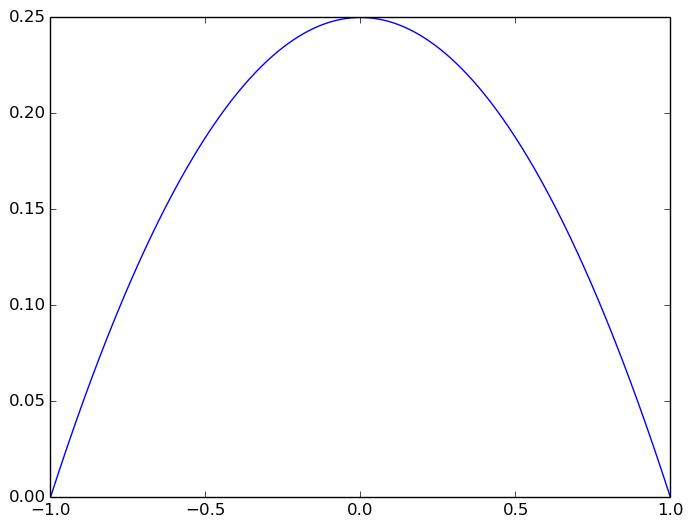

PyObject <matplotlib.text.Text object at 0x7f675766cd50>

In [28]:
x = collect([-1:0.001:1])
y = [ψj(3,x,0) for x in -1:0.001:1]
plot(x,y)
title("")